# SetUp & DataLoad

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**결측치 없음.범주형 변수 처리 필요.수치형 변수 분포 확인 필요.**

/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_220/3378287656.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_220/3378287656.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = ".2f", mask = mask)


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


<AxesSubplot: >

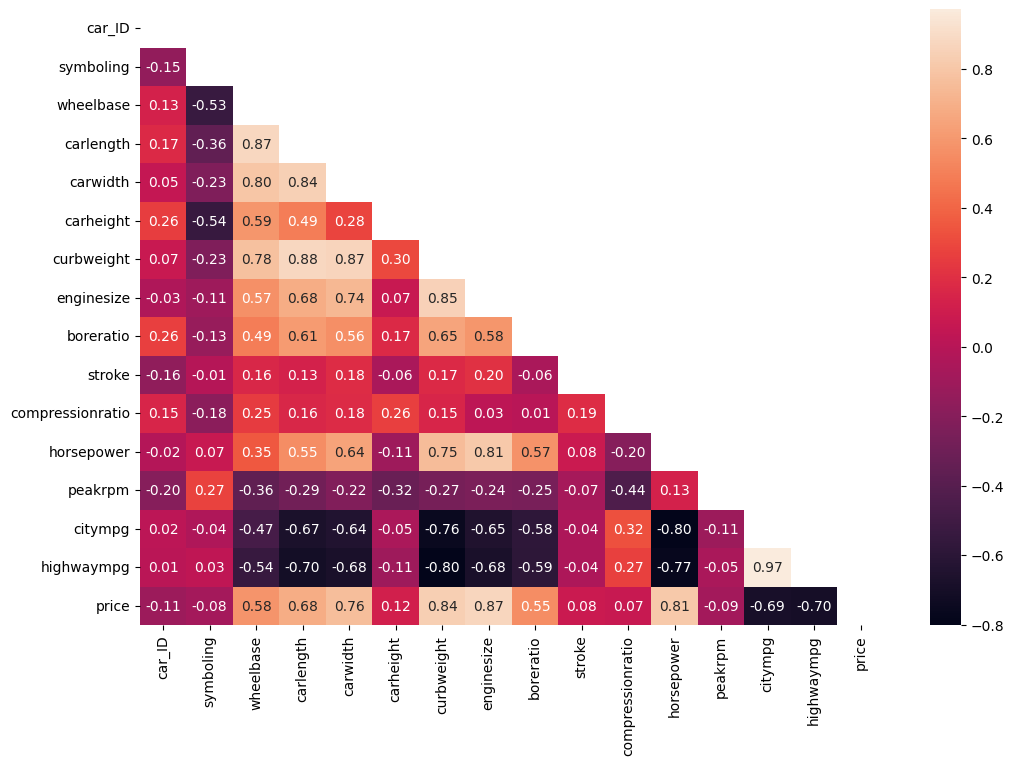

In [9]:
plt.figure(figsize = (12,8))
corr = df.corr()

print(corr['price'].sort_values(ascending = False))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", mask = mask)

- 상관계수 낮은 것 = 타겟 변수와 관련 없는 것
    - carheight           0.119336
    - stroke              0.079443
    - compressionratio    0.067984
    - symboling          -0.079978
    - peakrpm            -0.085267
    - car_ID             -0.109093



- car_ID : 분석 제외

In [10]:
X = df.drop(['price'], axis = 1)
y = df[['price']]

X = X.drop(['car_ID'], axis = 1) # 분석 제외할 컬럼 삭제

# 세부 EDA

In [11]:
X.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [12]:
ob_idx = []
for col in X.columns:
    if X[col].dtype == 'object':
        ob_idx.append(col)

num_idx = X.columns.difference(ob_idx)
num_idx = list(num_idx)

In [13]:
print(ob_idx, num_idx)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] ['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'symboling', 'wheelbase']


## 범주형 변수 EDA

In [15]:
X[ob_idx].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [16]:
print(X['doornumber'].unique(), X['cylindernumber'].unique())

['two' 'four'] ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [17]:
X['doornumber'] = X['doornumber'].replace({'two': 2, 'four': 4})
X['cylindernumber'] = X['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8})

X[ob_idx].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero stelvio,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi 100 ls,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi 100ls,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [22]:
# X['Brand'] = X['CarName'].str.extract('([A-Za-z]+)')
X['Brand'] = X['CarName'].str.split(" ").str[0]

In [23]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Brand
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


## 수치형 변수 EDA

Text(0.5, 0, 'price')

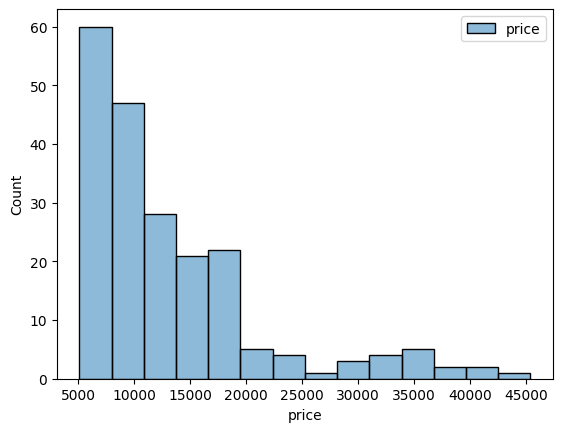

In [25]:
sns.histplot(y)
plt.xlabel('price')

In [26]:
X[num_idx].head()

,boreratio,carheight,carlength,carwidth,citympg,compressionratio,curbweight,enginesize,highwaympg,horsepower,peakrpm,stroke,symboling,wheelbase
0,3.47,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,2.68,3,88.6
1,3.47,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,2.68,3,88.6
2,2.68,52.4,171.2,65.5,19,9.0,2823,152,26,154,5000,3.47,1,94.5
3,3.19,54.3,176.6,66.2,24,10.0,2337,109,30,102,5500,3.40,2,99.8
4,3.19,54.3,176.6,66.4,18,8.0,2824,136,22,115,5500,3.40,2,99.4


In [27]:
X['carvolume'] = X['carheight'] * X['carlength'] * X['carwidth']
num_idx.append('carvolume')

In [28]:
len(num_idx)

15

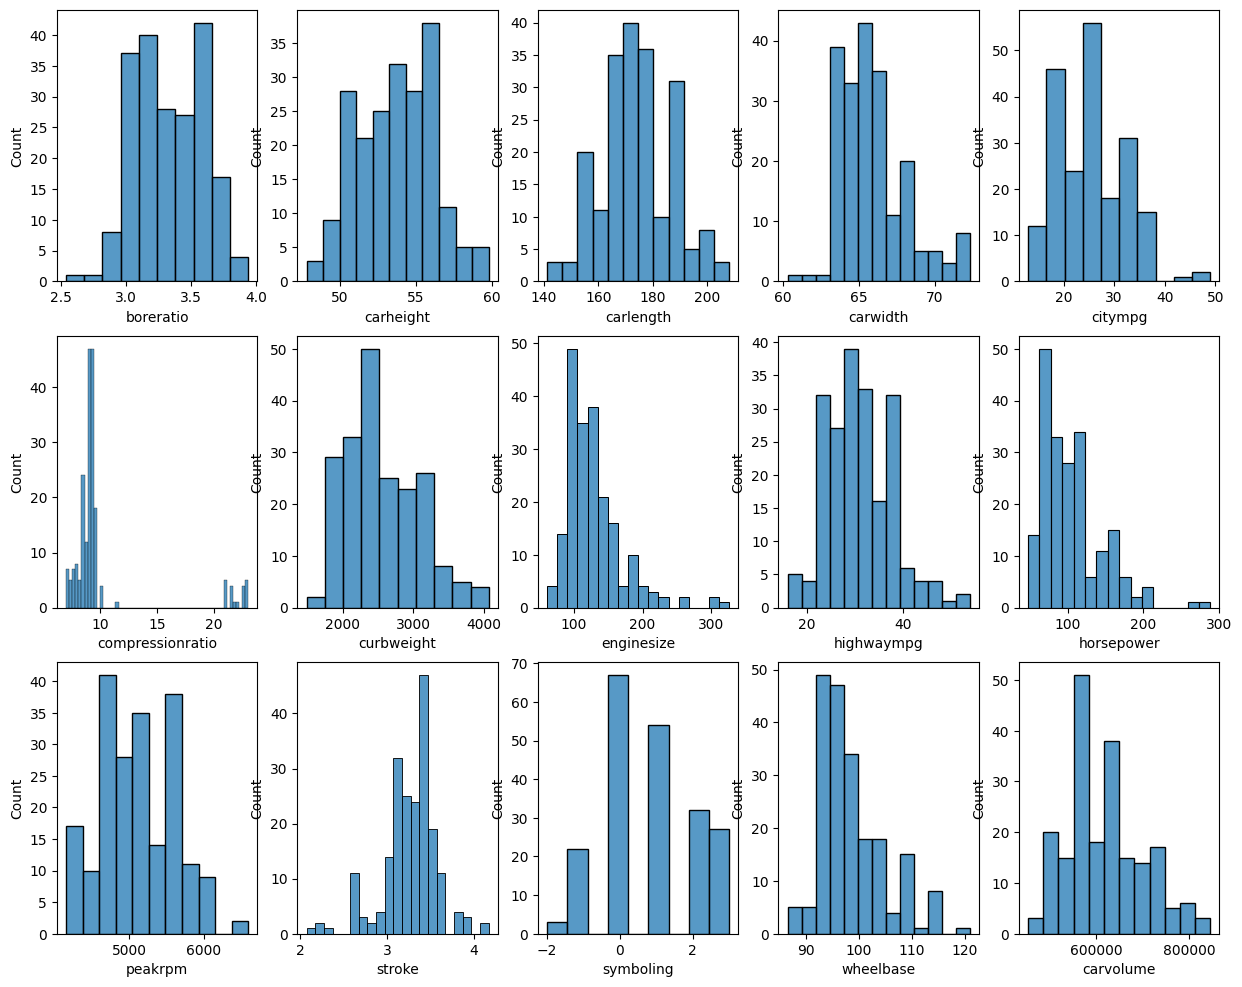

In [37]:
plt.figure(figsize = (15,12))
for i, col in enumerate(num_idx):
    ax = plt.subplot(3, 5, i+1)
    sns.histplot(x = str(col), data = X)
plt.show()

**symboling: 보험 위험 평가 -> 스케일링 제외**

In [38]:
num_idx.remove('symboling')
ob_idx.append('symboling')

In [40]:
print(num_idx) ; print(ob_idx)

['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'wheelbase', 'carvolume']
['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'symboling']


# Preprocessing

In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [43]:
transform = [('ob', OneHotEncoder(handle_unknown = 'ignore'), ob_idx), ('num', StandardScaler(), num_idx)]
col_transform = ColumnTransformer(transformers = transform)

In [44]:
col_transform

ColumnTransformer(transformers=[('ob', OneHotEncoder(handle_unknown='ignore'),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem',
                                  'symboling']),
                                ('num', StandardScaler(),
                                 ['boreratio', 'carheight', 'carlength',
                                  'carwidth', 'citympg', 'compressionratio',
                                  'curbweight', 'enginesize', 'highwaympg',
                                  'horsepower', 'peakrpm', 'stroke',
                                  'wheelbase', 'carvolume'])])

In [45]:
X_std = col_transform.fit_transform(X)

# 모델링

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

## 베이스라인

In [75]:
models = {
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'Extra Tree': ExtraTreesRegressor(),
        'XGB Regressor': XGBRegressor()
        }

result = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(model, ":", rmse)
    result.append((model, rmse))
    
print(result)



DecisionTreeRegressor() : 3202.5796335099776


/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_220/721677782.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor() : 1919.999006876769
GradientBoostingRegressor() : 2360.4634267163115


/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_220/721677782.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


ExtraTreesRegressor() : 2776.3188093655685
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 2597.010050122188
[(DecisionTreeRegressor(), 3202.5796335099776), (RandomForestRegressor(), 1919.999006876769), (GradientBoostingRegressor(), 2360.4634267163115), (ExtraTreesRegressor(), 2776.3188093655685), (XGBRe

## 튜닝

In [77]:
from sklearn.model_selection import GridSearchCV

from lightgbm import LGBMRegressor

In [97]:
models = {
        'Random Forest': (RandomForestRegressor(),
                          {'max_depth': range(2,20,10),
                            'n_estimators': range(50, 150, 50),
                            'min_samples_split': range(5, 100, 20)}
                         ),                  
        'Gradient Boosting': (GradientBoostingRegressor(),
                          {'max_depth': range(2,20,10),
                            'n_estimators': range(50, 150, 50),
                            'min_samples_leaf': range(5, 100, 20),
                          'learning_rate': [0.01, 0.1, 0.2]}
                         ), 
        'Extra Tree': (ExtraTreesRegressor(),
                       {'max_depth': range(2,20,10),
                            'n_estimators': range(50, 150, 50),
                            'min_samples_split': range(5, 100, 20)}
                         ),
        'XGB Regressor': (XGBRegressor(),
                        {'max_depth': range(2,20,10),
                            'n_estimators': range(50, 150, 50)}
                         ), 
        'LGBM Regressor': (LGBMRegressor(),
                        {'max_depth': range(2,20,10),
                            'n_estimators': range(50, 150, 50),
                            'min_child_samples': range(5, 100, 20)}
                         ) 
        }

In [98]:
model_result = []
r2_scores = []
rmse_scores = []
mae_scores = []
algorithm = []

for model_name, (model, param_grid) in models.items():
    print(f"{model_name} Training Start")
    gs = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 3)
    gs.fit(X_train, y_train)
    
    best_model = gs.best_estimator_
    best_params = gs.best_params_
    print(f"Best Parameters: {best_params}")
    
    y_pred = best_model.predict(X_test)
    r2 = best_model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"rmse: {rmse}\n")
    
    model_result.append((model_name, rmse))
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    algorithm.append(model_name)

    
results_df = pd.DataFrame({'Algorithm': algorithm,
                          'r2 score': r2_scores,
                          'rmse_score': rmse_scores,
                          'mae_score': mae_scores})
results_df

Random Forest Training Start


/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: Dat

Best Parameters: {'max_depth': 12, 'min_samples_split': 5, 'n_estimators': 100}
rmse: 1861.771816907261

Gradient Boosting Training Start


/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Best Parameters: {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 100}
rmse: 2674.583194716267

Extra Tree Training Start


/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: Dat

Best Parameters: {'max_depth': 12, 'min_samples_split': 5, 'n_estimators': 100}
rmse: 2916.8949466907234

XGB Regressor Training Start
Best Parameters: {'max_depth': 2, 'n_estimators': 100}
rmse: 2655.3390020145907

LGBM Regressor Training Start


/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Best Parameters: {'max_depth': 2, 'min_child_samples': 5, 'n_estimators': 100}
rmse: 2735.0951124994317



,Algorithm,r2 score,rmse_score,mae_score
0,Random Forest,0.956093,1861.771817,1335.423663
1,Gradient Boosting,0.909386,2674.583195,1879.691537
2,Extra Tree,0.892224,2916.894947,1742.032327
3,XGB Regressor,0.910686,2655.339002,1899.848966
4,LGBM Regressor,0.905240,2735.095112,1897.344245


In [99]:
model_result

[('Random Forest', 1861.771816907261),
 ('Gradient Boosting', 2674.583194716267),
 ('Extra Tree', 2916.8949466907234),
 ('XGB Regressor', 2655.3390020145907),
 ('LGBM Regressor', 2735.0951124994317)]

In [100]:
result

[(DecisionTreeRegressor(), 3202.5796335099776),
 (RandomForestRegressor(), 1919.999006876769),
 (GradientBoostingRegressor(), 2360.4634267163115),
 (ExtraTreesRegressor(), 2776.3188093655685),
 (XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
  2597.010050122188)]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 전처리와 모델을 파이프라인으로 연결
pipeline = Pipeline(steps=[('preprocessor', col_transform),
                           ('Regressor', RandomForestRegressor('max_depth' = 12, 'min_samples_split' = 5, 'n_estimators' = 100))])
                           

# 모델 학습
pipeline.fit(X_train, y_train)

# 모델 예측
y_pred = pipeline.predict(X_test)
